In [1]:
%pylab inline
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats

import mne
from mne.decoding import GeneralizationAcrossTime

sys.path.append('/neurospin/meg/meg_tmp/Calculation_Pedro_2014/scripts/decoding')

#from jr.plot import pretty_gat, pretty_decod
from jr_tweaked.plot import pretty_gat, pretty_decod

Populating the interactive namespace from numpy and matplotlib


In [4]:
#Paths
from calc_decoding_cfg import (data_path, result_path)
result_path = result_path + '/individual_results/'
figures_path = result_path + '/group_results/figures/'
group_result_path = result_path + '/group_results/' 

#List of parameters
subjects = ['s01', 's02', 's03', 's04', 's05', 's06', 's07', 's08', 's09', 's10', 
         's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18','s19', 's21', 's22']
            
#subjects = ['s02', 's03', 's04', 's05', 's06', 's07', 's08', 's09', 
         #'s11', 's12', 's13', 's14', 's15', 's16', 's17', 's18','s19', 's21','s22']

#subjects = ['s01', 's02', 's04', 's05', 's06', 's08', 's09', 's10', 
         #'s11', 's12', 's13', 's14', 's15', 's16', 's17', 's18','s19', 's21', 's22']


#subjects = ['s01', 's02']

conditions = [['opbigdec', 'opbigdec']]

In [12]:
#Combine results from all conditions
all_scores = []
all_diagonals = []

for c, cond in enumerate(conditions):
    for s, subject in enumerate(subjects):
        fname = result_path + subject + '_' + cond[0] + '_' + cond[1] + '_results_reg.npy' 
        results = np.load(fname)
        #Convert to list 
        results = results.tolist()
        all_scores.append(results['score'])
        all_diagonals.append(results['diagonal'])
score = results['score']
diagonal = results['diagonal']
time_calc = results['times_calc']
params = results['params']
all_scores = np.array(all_scores) #shape: subjects*n_cond, training_times, testing_times
all_diagonals = np.array(all_diagonals)  

In [13]:
#Average data
#Reshape 
all_scores = np.reshape(all_scores, (len(conditions), len(subjects), score.shape[0], score.shape[1])) #n_cond, n_subj, training_times, testing_times
all_diagonals = np.reshape(all_diagonals, (len(conditions), len(subjects), diagonal.shape[0]))

group_scores = np.zeros((len(conditions), all_scores.shape[2], all_scores.shape[3]))
sem_group_scores = np.zeros((len(conditions), all_scores.shape[2], all_scores.shape[3]))
group_diagonal = np.zeros((len(conditions), all_diagonals.shape[2]))
sem_group_diagonal = np.zeros((len(conditions), all_diagonals.shape[2]))


for c, cond in enumerate(conditions):
    group_scores[c, :, :] = np.mean(all_scores[c, :, :, :], 0)
    sem_group_scores[c, :, :] = stats.sem(all_scores[c, :, :, :], 0)

    group_diagonal[c, :] = np.mean(all_diagonals[c, :, :], 0)
    sem_group_diagonal[c, :] = stats.sem(all_diagonals[c, :, :], 0)

Populating the interactive namespace from numpy and matplotlib
['opbigdec', 'opbigdec']
s01


`%matplotlib` prevents importing * from pylab and numpy


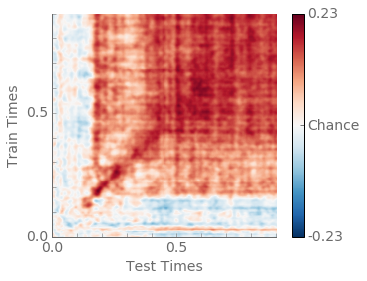

['opbigdec', 'opbigdec']
s02


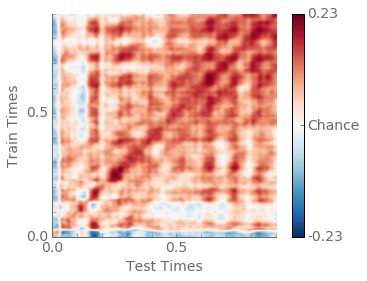

['opbigdec', 'opbigdec']
s03


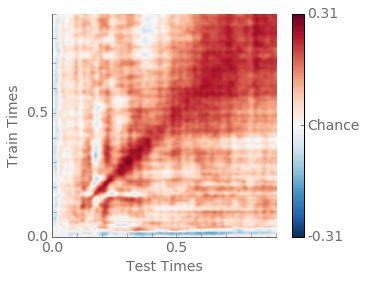

['opbigdec', 'opbigdec']
s04


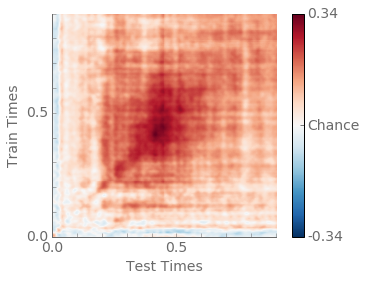

['opbigdec', 'opbigdec']
s05


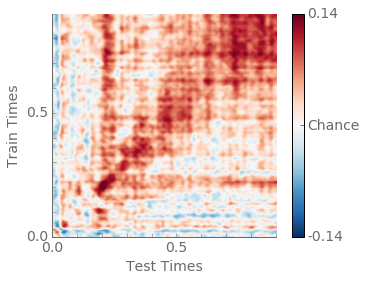

['opbigdec', 'opbigdec']
s06


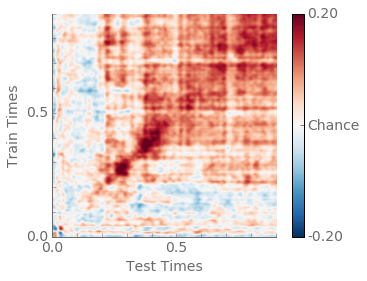

['opbigdec', 'opbigdec']
s07


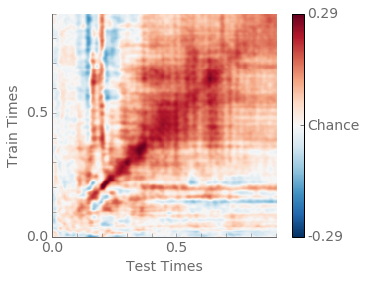

['opbigdec', 'opbigdec']
s08


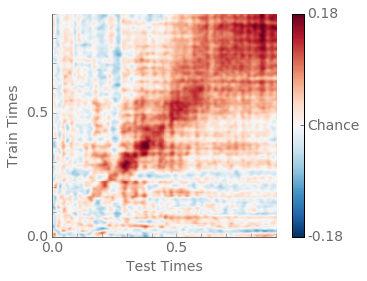

['opbigdec', 'opbigdec']
s09


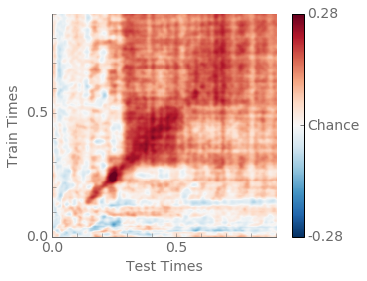

['opbigdec', 'opbigdec']
s10


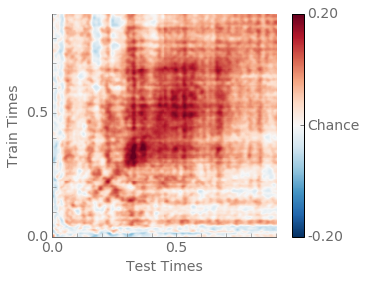

['opbigdec', 'opbigdec']
s11


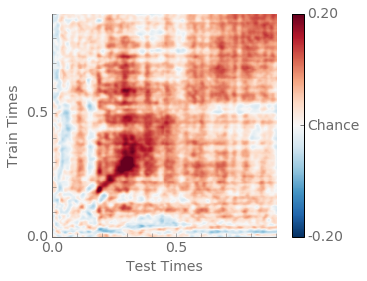

['opbigdec', 'opbigdec']
s12


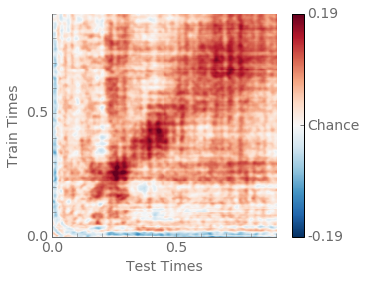

['opbigdec', 'opbigdec']
s13


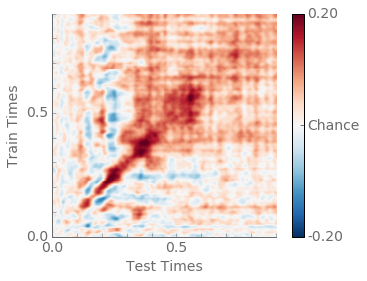

['opbigdec', 'opbigdec']
s14


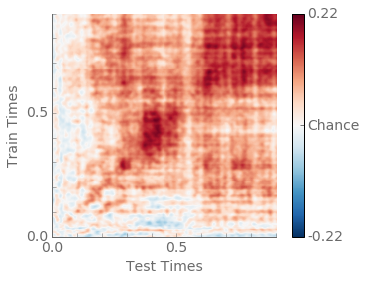

['opbigdec', 'opbigdec']
s15


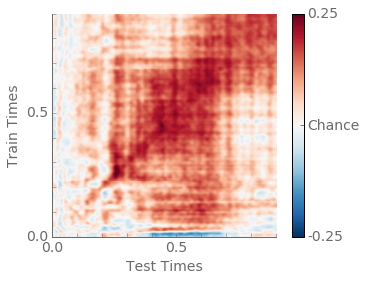

['opbigdec', 'opbigdec']
s16


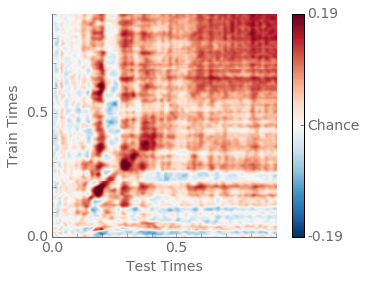

['opbigdec', 'opbigdec']
s17


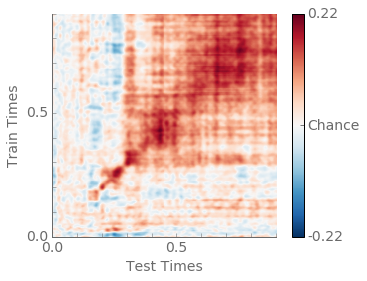

['opbigdec', 'opbigdec']
s18


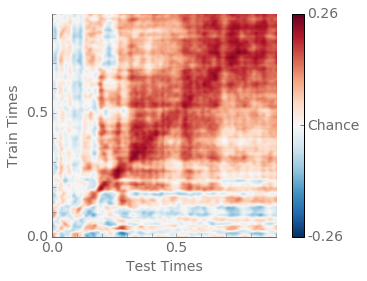

['opbigdec', 'opbigdec']
s19


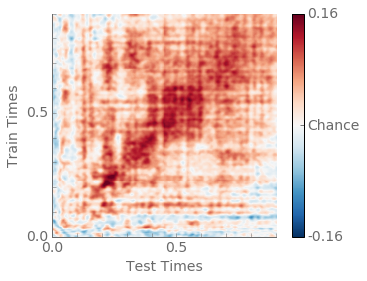

['opbigdec', 'opbigdec']
s21


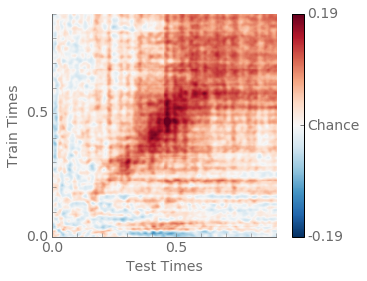

['opbigdec', 'opbigdec']
s22


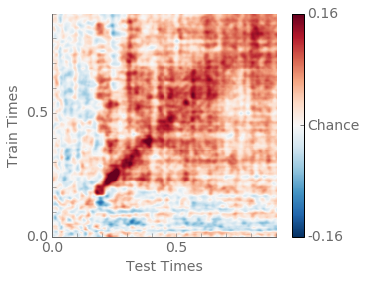

In [14]:
%pylab inline
# Plot individual data
for c, cond in enumerate(conditions):
    for s, subject in enumerate(subjects):
        print(cond)
        print(subject)
        pretty_gat(all_scores[c, s, :, :], chance=.0)

        plt.show()

In [ ]:
data1 = group_scores[0, :, :]



In [ ]:
times_calc

In [ ]:
times_calc = np.arange(1.2,3.2004,0.004)


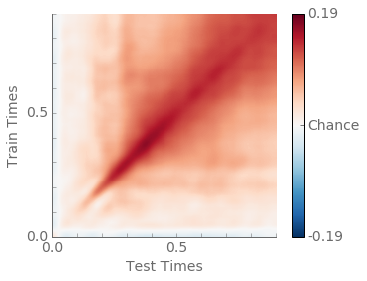

In [16]:
#pretty_gat(group_scores[c, :, :], chance=.5, times=times_calc, smoothWindow=10)
pretty_gat(group_scores[c, :, :], chance=0, smoothWindow=5)
ax = plt.gca()


In [ ]:
ax.axhline(.1, color='k',linestyle='dashed')    
ax.axhline(.3, color='k',linestyle='dotted')    
ax.axhline(.75, color='k',linestyle='dashed') 
ax.axhline(.8, color='k', linestyle='dotted') 
ax.axhline(.85, color='k', linestyle='dashed') 
ax.axhline(1.016, color='k', linestyle='dotted') 

ax.axvline(.1, color='k',linestyle='dashed')    
ax.axvline(.5, color='k',linestyle='dotted')    
ax.axvline(.9, color='k',linestyle='dashed') 
ax.axvline(1.3, color='k', linestyle='dotted') 
ax.axvline(1.7, color='k',linestyle='dashed')    
ax.axvline(2.1, color='k',linestyle='dotted') 


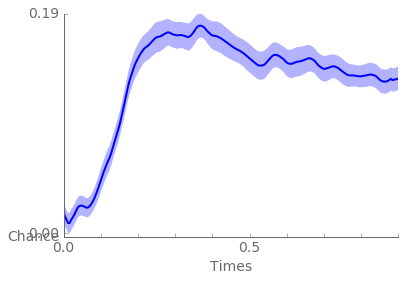

In [18]:

pretty_decod(all_diagonals[c, :, :], chance=.0, alpha=4, smoothWindow=5, color='blue')

#pretty_decod(all_diagonals[c, :, :], chance=.5, alpha=4, smoothWindow=10, color='lightgreen', lim=[.48, .6])

fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(18.5, 10.5)


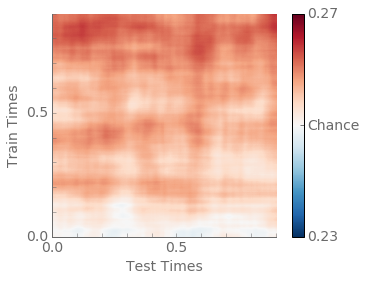

In [109]:
pretty_gat(group_scores[c, :, :], chance=.25, smoothWindow=10)


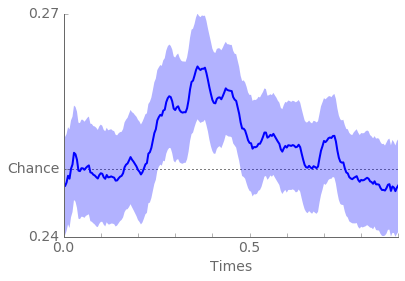

In [103]:
pretty_decod(all_diagonals[c, :, :], chance=.25, alpha=4, smoothWindow=10, color='blue')





In [ ]:
time_calc = arange(-0.1,0.8,0.012)

In [ ]:
group_scores.shape[2]

In [ ]:
times_calc.shape[0]